# Import Libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Show Dataset

In [6]:
rt=pd.read_csv("compressed_data.csv")
rt.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17032\743053526.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  rt=pd.read_csv("compressed_data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
rt.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# Check Missing Values

In [11]:
rt.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [13]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Handing Missing Values

In [15]:
rt['last review']=pd.to_datetime(rt['last review'],errors='coerce')

In [17]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [19]:
rt.fillna({'reviews per month':0,'last review':rt['last review'].min()},inplace=True)

In [21]:
rt.dropna(subset=['NAME','host name'],inplace=True)

In [23]:
rt.isnull().sum()

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [25]:
rt=rt.drop(columns=['license','house_rules'],errors='ignore')

In [27]:
rt.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [29]:
# Remove dollar signs and Convert into Float
rt['price']=rt['price'].replace('[\$,]','',regex=True).astype(float)
rt['service fee']=rt['service fee'].replace('[\$,]','',regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\hp\AppData\Local\Temp\ipykernel_17032\516913787.py:2: SyntaxWarning: invalid escape sequence '\$'
  rt['price']=rt['price'].replace('[\$,]','',regex=True).astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_17032\516913787.py:3: SyntaxWarning: invalid escape sequence '\$'
  rt['service fee']=rt['service fee'].replace('[\$,]','',regex=True).astype(float)


In [31]:
rt.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


# Remove Duplicates

In [33]:
rt.drop_duplicates(inplace=True)

In [35]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

# Descriptive Statistics 

In [37]:
rt.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# Visualization

# What is the distribution of listing prices?

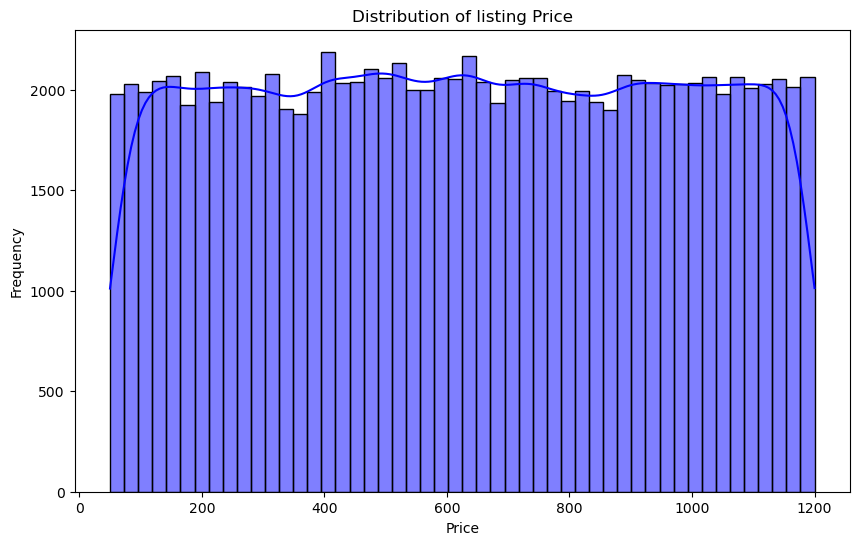

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(rt['price'],bins=50,kde=True,color='blue')
plt.title('Distribution of listing Price')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
The histogram shows a fairly even distribution of 
listing prices across different price ranges,indicating no
particular concentration of listings in any specific price range.

# How are different room types distributed?

In [41]:
rt['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

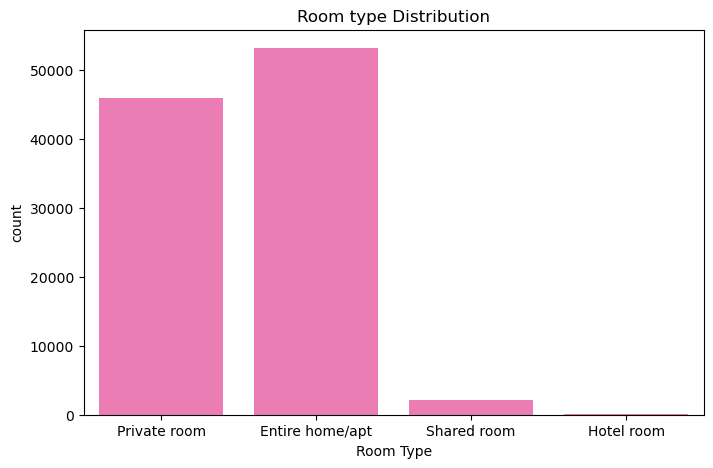

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x=rt['room type'],data=rt,color='hotpink')
plt.title('Room type Distribution')
plt.xlabel('Room Type')
plt.show()

# How are listings distribution across different neighborhoods 

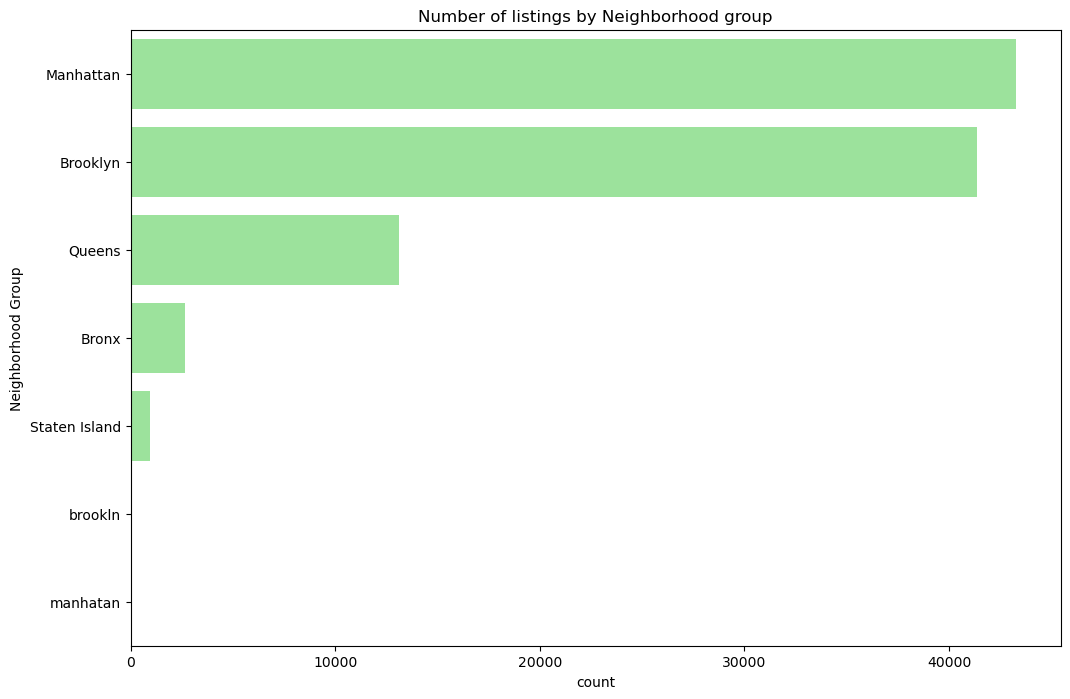

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(y='neighbourhood group', data=rt,color='lightgreen',order=rt['neighbourhood group'].value_counts().index)
plt.title('Number of listings by Neighborhood group')
plt.xlabel('count')
plt.ylabel('Neighborhood Group')
plt.show()
              

# What is the relationship between price and room type?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


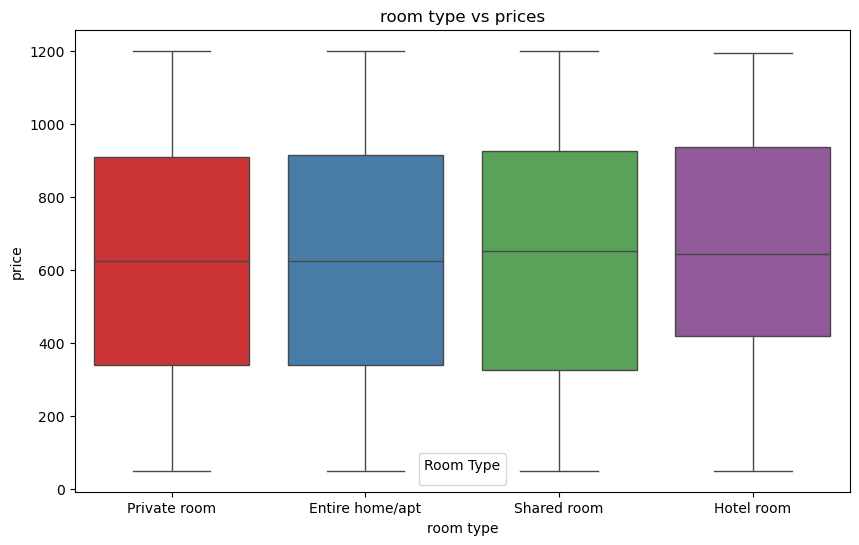

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type',y='price',data=rt,hue='room type',palette='Set1')
plt.title('room type vs prices')
plt.legend(title='Room Type')
plt.show()

# How has the number of reviews change over with  time

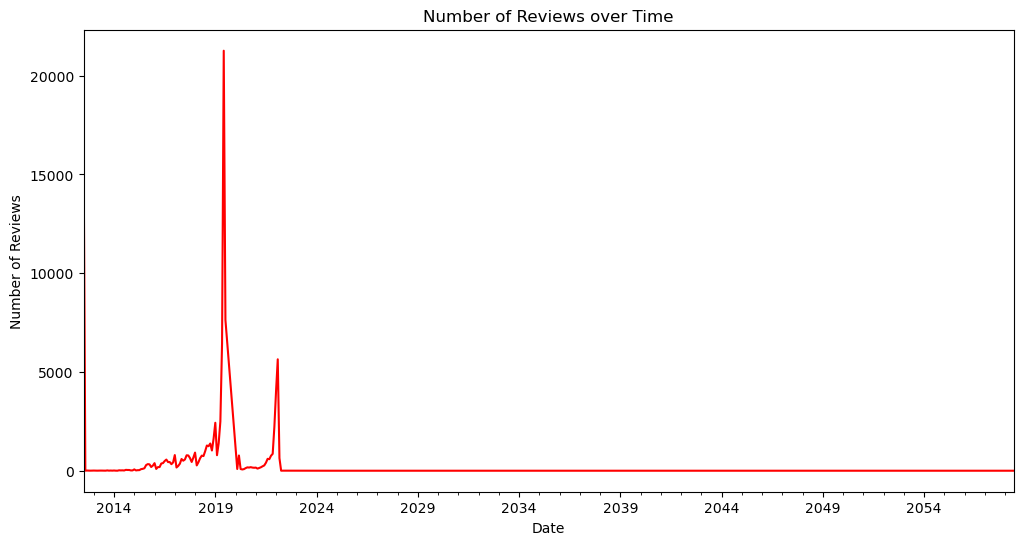

In [49]:
rt['last review']=pd.to_datetime(rt['last review'])
reviews_over_time=rt.groupby(rt['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
reviews_over_time.plot(kind='line',color='red')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews over Time')
plt.show()

In [51]:
rt = rt.dropna(subset=['price'])

In [53]:
X = rt.drop('price', axis=1)
y = rt['price']

In [73]:
print("Missing values in target:", y.isna().sum())

Missing values in target: 0


In [75]:
# Identify categorical and numerical columns

num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns

In [67]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

In [63]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # fill missing numerical
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fill missing categorical
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [65]:
 #Full preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Create full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'host id', 'lat',
                                                   'long', 'Construction year',
                                                   'service fee',
                                                   'minimum nights',
                                                   'number of reviews',
                                                   'reviews per month',
                                                   'review rate number',
                                                   'calculated host listings '
                                                   'count',
                                                   'availability 365']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
#  Predict on test set
y_pred = pipeline.predict(X_test)

#  Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

In [ ]:
# Define models
other_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42)
}

In [ ]:
# Save the predictions to a CSV
predictions_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})
predictions_df.to_csv("airbnb_price_predictions.csv", index=False)

# Save the trained model
joblib.dump(pipeline, "airbnb_price_model.pkl")


In [ ]:

# Train and evaluate
other_results = {}

for name, model in other_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    other_results[name] = {'RMSE': rmse, 'R2': r2}
    
    # Save model
    #joblib.dump(pipeline, f"/mnt/data/{name.lower().replace(' ', '_')}_airbnb_model.pkl")
    joblib.dump(pipeline, "airbnb_price_model.pkl")

other_results